In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
SRC_PATH="parsed"

# Change the value to True if you want to see the heatmap for correlations
display_correlations = False

In [2]:
def load_housing_data(src=SRC_PATH):
    csv_path = os.path.join(src, "src.csv")
    return pd.read_csv(csv_path)

In [3]:
df = load_housing_data()
df.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       998 non-null    object 
 1   Links       998 non-null    int64  
 2   Categories  998 non-null    int64  
 3   Images      998 non-null    int64  
 4   References  998 non-null    int64  
 5   Length      998 non-null    int64  
 6   Quality     997 non-null    float64
 7   Theme       998 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [5]:
df["Theme"].value_counts()

Science                         210
Society and social sciences     146
People                          112
Geography                       106
Technology                       98
History                          83
Everyday life                    57
Philosophy and religion          55
Arts                             45
Mathematics                      45
Health, medicine and disease     41
Name: Theme, dtype: int64

In [6]:
df.describe()

,Links,Categories,Images,References,Length,Quality
count,998.000000,998.000000,998.000000,998.000000,998.000000,997.000000
mean,859.871743,38.109218,41.362725,218.013026,50315.901804,2.749248
std,513.129578,25.571013,37.425723,181.221618,25837.048931,0.959685
min,99.000000,7.000000,2.000000,6.000000,7047.000000,1.000000
25%,477.000000,21.000000,21.000000,86.000000,30272.000000,2.000000
50%,733.000000,30.000000,31.000000,157.000000,46976.500000,3.000000
75%,1140.750000,44.000000,48.750000,297.750000,63421.500000,3.000000
max,3662.000000,153.000000,339.000000,1310.000000,165877.000000,5.000000


In [7]:
if display_correlations:
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True)

In [8]:
# Alternative way of filtering
# df_filtered = df[df["Theme"] == "Arts"]

df_filtered_just_arts = df.query("Theme == 'Arts'")
df_filtered_just_arts.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [9]:
categories = sorted(set(df['Theme']))

In [10]:
def corr_for_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category(category)
        i+=1

    plt.tight_layout()

In [11]:
# Science subset w every attribute
df_science = df.query("Theme == 'Science'")
df_science.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
645,Science,661,32,29,416,45955,3.0,Science
646,Scientific method,769,17,21,151,73762,3.0,Science
647,Measurement,304,16,10,38,20674,2.0,Science
648,International System of Units,681,31,19,195,58608,4.0,Science
649,Nature,746,22,59,207,37866,4.0,Science


In [12]:
df_arts_without_quality = df.query("Theme == 'Arts'")
df_arts_without_quality.drop(columns=["Quality"])
df_arts_without_quality.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [13]:
df_without_quality = df.drop(columns=["Quality"])
df_without_quality.head()

,Title,Links,Categories,Images,References,Length,Theme
0,Hammurabi,1103,45,44,97,15484,People
1,Hatshepsut,755,49,18,97,33266,People
2,Ramesses II,662,43,25,119,32507,People
3,Cyrus the Great,515,61,32,213,47616,People
4,Alexander the Great,1910,71,75,401,89053,People


In [14]:
def corr_for_old_and_new_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category_for_df = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df, dtype=bool))
    ax[i,0].set_title(category)
    sns.heatmap(corr_within_category_for_df, mask=mask, annot=True, ax=ax[i,0])

    df_filtered = df_without_quality.query(f"Theme == '{category}'")
    corr_within_category_for_df_filtered = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df_filtered, dtype=bool))
    ax[i,1].set_title("without Quality")
    sns.heatmap(corr_within_category_for_df_filtered, mask=mask, annot=True, ax=ax[i,1])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,2, figsize=(8, 24))
    i = 0

    for category in categories:
        corr_for_old_and_new_category(category)
        i+=1

    plt.tight_layout()

# Correlation with non-numerical values

In [15]:
df[df.isna().any(axis=1)]

,Title,Links,Categories,Images,References,Length,Quality,Theme
846,Wind,563,11,23,277,41140,NaN,Science


In [16]:
# Drop missing values
df = df.dropna()

In [17]:
df[df.isna().any(axis=1)]

,Title,Links,Categories,Images,References,Length,Quality,Theme


In [18]:
df_all_numerical = df.copy()
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [19]:
i = 0
mapping = {}
for category in categories:
    mapping.update({category: i})
    i+=1

df_all_numerical["T.Numerical"] = df_all_numerical.Theme.map(mapping)
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme,T.Numerical
0,Hammurabi,1103,45,44,97,15484,4.0,People,6
1,Hatshepsut,755,49,18,97,33266,3.0,People,6
2,Ramesses II,662,43,25,119,32507,2.0,People,6
3,Cyrus the Great,515,61,32,213,47616,2.0,People,6
4,Alexander the Great,1910,71,75,401,89053,4.0,People,6


In [20]:
df_all_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        997 non-null    object 
 1   Links        997 non-null    int64  
 2   Categories   997 non-null    int64  
 3   Images       997 non-null    int64  
 4   References   997 non-null    int64  
 5   Length       997 non-null    int64  
 6   Quality      997 non-null    float64
 7   Theme        997 non-null    object 
 8   T.Numerical  997 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 77.9+ KB


In [21]:
if display_correlations:
    corr_matrix = df_all_numerical.corr()
    sns.heatmap(corr_matrix, annot=True)

In [22]:
def corr_for_category_all_numerical(category):
    df_filtered = df_all_numerical.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])

if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category_all_numerical(category)
        i+=1

    plt.tight_layout()

# Test and Train

Splitting the data before normalization

In [23]:
from sklearn.model_selection import train_test_split
attributes = ["Links", "Categories", "Images", "References", "Length", "Quality"]

X = df[attributes]
Y = df["Theme"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((797, 6), (200, 6), (797,), (200,))

Check for NaN

In [24]:
X_train[X_train.isna().any(axis=1)]

,Links,Categories,Images,References,Length,Quality


# Standardization

After the test split

In [25]:
X_train.head()

,Links,Categories,Images,References,Length,Quality
265,1910,80,166,627,106716,3.0
94,364,85,24,287,45609,3.0
584,2020,40,29,64,22055,3.0
669,606,23,64,83,16179,2.0
798,365,19,19,155,25886,4.0


### Z-score normalization or standardization
Step 1: Standardize the train set

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_train_std.head()

,Links,Categories,Images,References,Length,Quality
0,2.124409,1.675766,3.303233,2.324396,2.127246,0.288082
1,-0.953108,1.873989,-0.449202,0.410919,-0.182925,0.288082
2,2.343378,0.089984,-0.317074,-0.844096,-1.073392,0.288082
3,-0.471375,-0.583974,0.607822,-0.737166,-1.295537,-0.769988
4,-0.951117,-0.742552,-0.581330,-0.331960,-0.928560,1.346152


Step 2: Standardize the test set with the train set's parameters.

In [27]:
X_test.head()

,Links,Categories,Images,References,Length,Quality
650,804,28,43,235,45746,4.0
668,518,34,49,749,53690,4.0
364,1591,22,37,87,52472,3.0
676,645,21,33,173,37514,2.0
698,996,27,30,428,56023,5.0


In [28]:
X_test_std = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)
X_test_std.head()

,Links,Categories,Images,References,Length,Quality
0,-0.077230,-0.385751,0.052884,0.118270,-0.177746,1.346152
1,-0.646551,-0.147884,0.211438,3.010996,0.122580,1.346152
2,1.489397,-0.623618,-0.105669,-0.714655,0.076533,0.288082
3,-0.393740,-0.663263,-0.211372,-0.230658,-0.488960,-0.769988
4,0.304971,-0.425396,-0.290648,1.204449,0.210780,2.404222


### Min-max scaling or normalization
[Doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
Step 1: Normalize the train set

In [29]:
X_train.head()

,Links,Categories,Images,References,Length,Quality
265,1910,80,166,627,106716,3.0
94,364,85,24,287,45609,3.0
584,2020,40,29,64,22055,3.0
669,606,23,64,83,16179,2.0
798,365,19,19,155,25886,4.0


In [30]:
# Normalized to a min value of 0 and max value of 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_train),columns = X_train.columns)
X_train_nrml.head()

,Links,Categories,Images,References,Length,Quality
0,0.625561,0.500000,0.486647,0.571823,0.627520,0.50
1,0.091537,0.534247,0.065282,0.258748,0.242788,0.50
2,0.663558,0.226027,0.080119,0.053407,0.094491,0.50
3,0.175130,0.109589,0.183976,0.070902,0.057495,0.25
4,0.091883,0.082192,0.050445,0.137201,0.118611,0.75


Step 2: Normalize the test set with the train set’s parameters.

In [31]:
X_test.head()

,Links,Categories,Images,References,Length,Quality
650,804,28,43,235,45746,4.0
668,518,34,49,749,53690,4.0
364,1591,22,37,87,52472,3.0
676,645,21,33,173,37514,2.0
698,996,27,30,428,56023,5.0


In [32]:
X_test_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_test),columns = X_test.columns)
X_test_nrml.head()

,Links,Categories,Images,References,Length,Quality
0,0.181792,0.146341,0.138462,0.163424,0.303988,0.75
1,0.099914,0.195122,0.161538,0.563424,0.371028,0.75
2,0.407100,0.097561,0.115385,0.048249,0.360749,0.50
3,0.136273,0.089431,0.100000,0.115175,0.234516,0.25
4,0.236759,0.138211,0.088462,0.313619,0.390717,1.00


# Support Vector Machine

[SVMDocumentation](https://scikit-learn.org/stable/modules/svm.html)

## Normalized

In [33]:
from sklearn.svm import SVC

svm_nrml = SVC(kernel="linear")
svm_nrml.fit(X_train_nrml, Y_train)

SVC(kernel='linear')

In [34]:
svm_nrml.score(X_train_nrml, Y_train)

0.4328732747804266

In [35]:
svm_nrml.score(X_test_nrml, Y_test)

0.48

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [36]:
from sklearn.metrics import confusion_matrix

y_pred_nrml = svm_nrml.predict(X_test_nrml)
cm = confusion_matrix(Y_test, y_pred_nrml)
cm

# Include the text
# Problems w class imbalance

array([[ 0,  0,  0,  0,  1,  0,  0,  0,  4,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  2,  0],
       [ 0,  0, 12,  0,  1,  0,  1,  0,  3,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  1,  0],
       [ 0,  0,  1,  0,  7,  0,  1,  0,  3,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  4,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  3,  0],
       [ 0,  0,  1,  0,  1,  0,  4,  0,  8, 13,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  4,  0]], dtype=int64)

[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

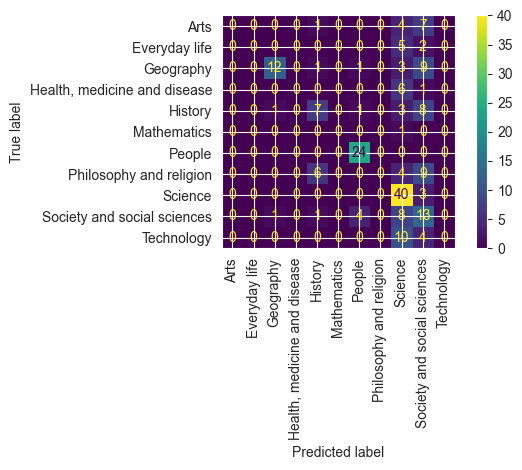

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_nrml.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

## Standardized

In [38]:
svm_std = SVC(kernel="linear")
svm_std.fit(X_train_std, Y_train)

SVC(kernel='linear')

In [39]:
svm_std.score(X_train_std, Y_train)

0.48180677540777916

In [40]:
svm_std.score(X_test_std, Y_test)

0.51

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [41]:
y_pred_std = svm_std.predict(X_test_std)
cm = confusion_matrix(Y_test, y_pred_std)
cm

array([[ 0,  0,  0,  0,  2,  0,  0,  1,  4,  4,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  3,  3,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  4,  3,  4,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  5,  1,  0],
       [ 1,  0,  0,  0,  4,  0,  1,  2,  4,  6,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 23,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  8,  3,  5,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1, 40,  1,  0],
       [ 0,  0,  3,  0,  1,  0,  3,  1,  8, 11,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  4,  0]], dtype=int64)

[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

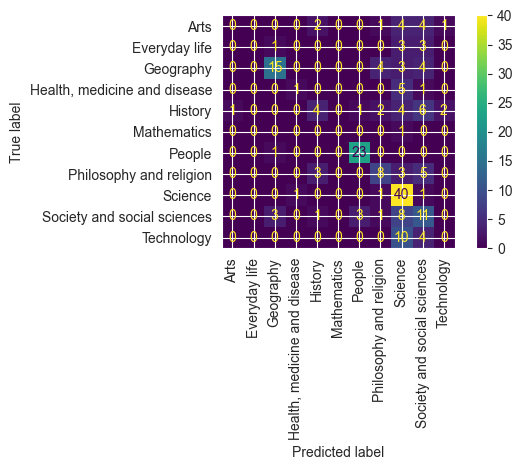

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_std.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()